# import 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sys.path.append(os.path.abspath('..'))
from src.data_processing import load_data, clean_data, feature_engineer_fraud, transform_data, handle_imbalance


In [8]:
import importlib.util
import sys
import os
module_path = r'C:\Users\user\Desktop\Project\Adey_Innovations\src\data_processing.py'
spec = importlib.util.spec_from_file_location("data_loader", module_path)
data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(data_loader)

# now you can access your function
load_data = data_loader.load_data

# test
print(load_data)

<function load_data at 0x0000017B2DF64400>


# laod data

In [9]:
fraud_df = load_data(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\raw\Fraud_Data.csv")
ip_df= load_data(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\raw\IpAddress_to_Country.csv")
creditcard_df= load_data(r"C:\Users\user\Desktop\Project\Adey_Innovations\data\raw\creditcard.csv")


In [14]:
#fraud_df, ip_df, creditcard_df = load_data()
fraud_df = clean_data(fraud_df)
fraud_df = feature_engineer_fraud(fraud_df, ip_df)

In [7]:
print(fraud_df.head())

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


#  Feature Engineering Distribution

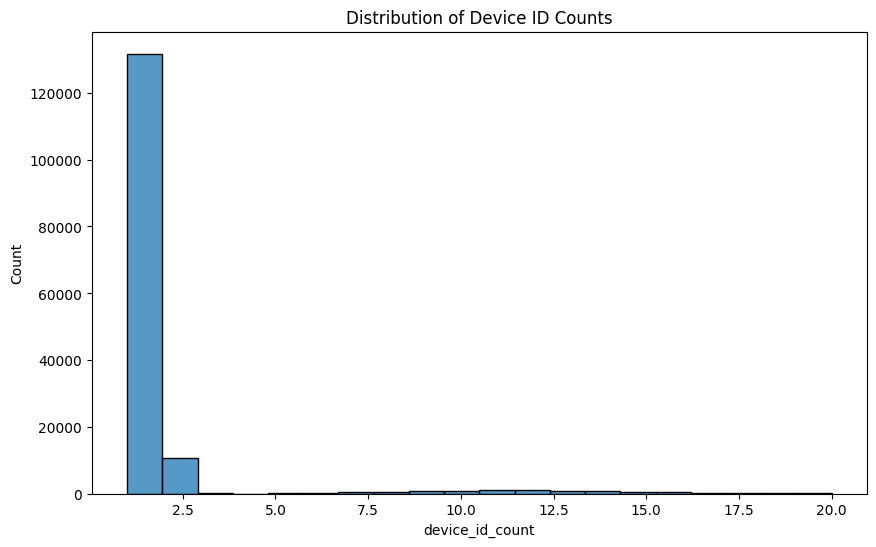

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['device_id_count'], bins=20)
plt.title('Distribution of Device ID Counts')
plt.show()

# Data Transformation

In [16]:
num_cols = ['purchase_value', 'age', 'hour_of_day', 'time_since_signup', 'device_id_count', 'ip_address_count']
cat_cols = ['source', 'browser', 'sex']

transformed_df, preprocessor = transform_data(fraud_df, cat_cols, num_cols)
print(f"Transformed shape: {transformed_df.shape}")
transformed_df.head()

Transformed shape: (151112, 27)


,purchase_value,age,hour_of_day,time_since_signup,device_id_count,ip_address_count,source_Ads,source_Direct,source_SEO,browser_Chrome,...,signup_time,purchase_time,device_id,ip_address,class,ip_int,lower_bound_ip_address,upper_bound_ip_address,country,day_of_week
0,-0.160204,0.679914,-1.377455,-0.136057,-0.261514,-0.232162,0.0,0.0,1.0,1.0,...,2015-02-24 22:55:49,2015-04-18 02:47:11,QVPSPJUOCKZAR,732758368,0,NaN,NaN,NaN,Unknown,5
1,-1.142592,2.304476,-1.522122,-1.571877,-0.261514,-0.232162,1.0,0.0,0.0,1.0,...,2015-06-07 20:39:50,2015-06-08 01:38:54,EOGFQPIZPYXFZ,350311387,0,NaN,NaN,NaN,Unknown,0
2,-1.197169,2.304476,0.937208,-1.577617,3.941861,4.004751,0.0,0.0,1.0,0.0,...,2015-01-01 18:52:44,2015-01-01 18:52:45,YSSKYOSJHPPLJ,2621473820,1,NaN,NaN,NaN,Unknown,3
3,0.385567,0.911994,0.213876,-1.420213,-0.261514,-0.232162,0.0,0.0,1.0,0.0,...,2015-04-28 21:13:25,2015-05-04 13:54:50,ATGTXKYKUDUQN,3840542443,0,NaN,NaN,NaN,Unknown,0
4,0.112681,1.376155,0.937208,-0.182509,-0.261514,-0.232162,1.0,0.0,0.0,0.0,...,2015-07-21 07:09:52,2015-09-09 18:40:53,NAUITBZFJKHWW,415583117,0,NaN,NaN,NaN,Unknown,2


# Handling Class Imbalance

In [17]:
X = transformed_df.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class', 'country', 'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'day_of_week'], axis=1, errors='ignore')
X = X[X.columns[X.columns.isin(transformed_df.columns)]] # ensure only transformed cols
# Actually transform_data returns all cols. Let's fix that in logic if needed.

y = fraud_df['class']

print("Before SMOTE:")
print(y.value_counts())

X_res, y_res = handle_imbalance(X, y, strategy='smote')

print("\nAfter SMOTE:")
print(pd.Series(y_res).value_counts())

Before SMOTE:
class
0    136961
1     14151
Name: count, dtype: int64

After SMOTE:
class
0    136961
1    136961
Name: count, dtype: int64


# SAVE FEATURE-ENGINEERED DATA